In [35]:
beta = np.diff(infectRaw+recovRaw+deadRaw)/infectRaw[:-1] #scaling won't matter here, cancels out

In [37]:
cons = [len(infectRaw)]

def simulate(theta, cons):
    
    return theta
    
def randStart():
    theta = np.ones(6)

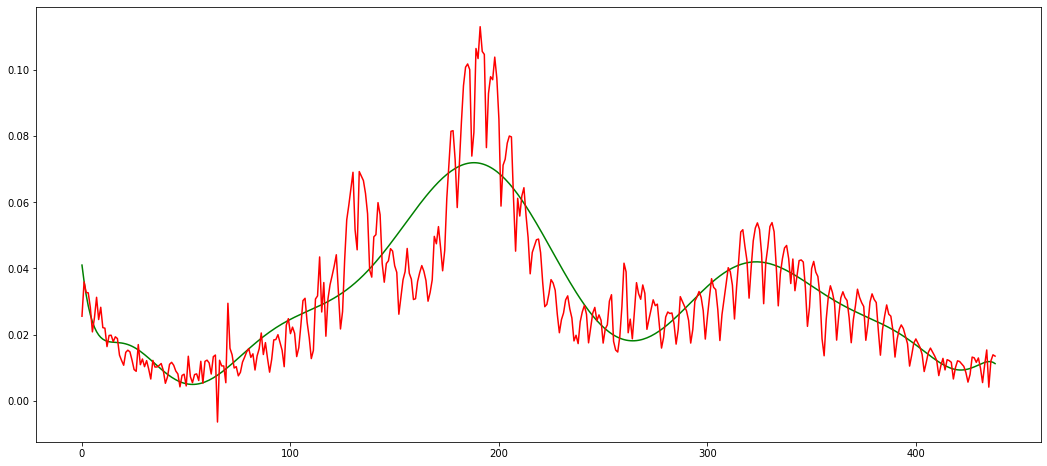

In [53]:
# from scipy.interpolate import lagrange
from numpy.polynomial import legendre
polyCount = 13 #degree of polynomial

timeSeries = np.arange(len(beta))
coef = legendre.legfit(timeSeries, beta, polyCount)

fitSeries = legendre.legval(timeSeries, coef)

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(timeSeries, fitSeries, color="green")
ax.plot(timeSeries, beta, color="red")

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import random

import Models.OWID as owid
import Models.SIRD as sird
import Models.GradientDescent as gd


def startFunc(consts):
    
    #return ukVars
    
    recovRate = consts[0]
    deathRate = consts[1]
    
    params = np.zeros(7)
        
    params[0] = random.random()*.001 #I(0), between 0 and .1 percent of the population
    params[1] = random.random()*.1 #A(0), between 0 and 10 percent of the population
    
    params[2] = .1 + random.random()*10 #alpha0 knowledge rate [.001, 10.1]
    params[3] = .001 + random.random()*.05 #alpha1 knowledge decay rate [.001, .051]

    params[4] = (recovRate+deathRate) * random.random() #beta0, floor infection rate
    #theta[4] = 0
    params[5] = (recovRate+deathRate - params[4]) * (.5*random.random() + 1.1) #beta1, ceiling infectRate
    params[6] = .5 + random.random()*5 #beta2, exponential [.5, 5.5]
    
    return params
    
def simFunc(params, consts):
    
    recovRate = consts[0]
    deathRate = consts[1]
    dayNum = consts[2]
    
    I = np.zeros((dayNum))
    K = np.zeros((dayNum))

    I[0] = params[0] # I(0)
    K[0] = params[1]
    alpha0 = params[2]
    alpha1 = params[3]
    beta = params[4:] #beta0, beta1, beta2
    

    #iterate the arrays using the definition K' and I'
    for t in range(len(I)-1): #define I and K on range [1, length)
        diffI = (beta[0] + (beta[1] / (1 + (K[t])**beta[2] )) )*I[t] - (recovRate + deathRate)*I[t]
        diffK = alpha0*I[t] - alpha1*K[t]

        I[t+1] = diffI + I[t]
        K[t+1] = diffK + K[t]

    return I #I is the data generated

def constrainFunc(parameters, consts):
    
    params = np.copy(parameters)
    
    recovRate = consts[0]
    deathRate = consts[1]
    
    #fill the constraints
    paramConstraints = np.zeros((len(params),2)) #min, max for each one
    
    paramConstraints[0] = [.0000000001, .005] #I(t)
    paramConstraints[1] = [ 0.000000001, 10e10] #K(t), no real ceiling

    paramConstraints[2] = [0.00001, 10e10] #alpha0
    paramConstraints[3] = [0.00001, 1] #alpha1

    paramConstraints[4] = [0.0000001, recovRate + deathRate] #beta0 < recoveries
    paramConstraints[5] = [recovRate + deathRate - params[4], 5] #beta1, beta1+beta2 ceiling
    paramConstraints[6] = [.25, 10] #beta2
    
    for i in range(len(params)): #exercise each constraint
        params[i] = min( max(paramConstraints[i,0], params[i]) , paramConstraints[i,1])
    
    return params
    

## US Fit

In [68]:
dates, I, R, D, V = owid.LoadCountryNormal("United States") 

gradDesc.eta = .1

gradDesc = gd.GradDescent(I, [sird.getGamma(I,R), sird.getNu(I,D), len(I)], startFunc, simFunc, constrainFunc)
gradDesc.solveVars(printOut=1000)

Startin Vars:
Error: 0.022175820572929713
[7.71257932e-04 2.12133047e-02 3.31698086e+00 3.82789457e-03
 2.80343615e-02 6.58110867e-02 4.90155821e+00]
Iteration: 1000 Error: 0.007194547260723597 , improvement: 0.0006004003138845553
Iteration: 2000 Error: 0.005344959332818852 , improvement: 8.88157116836136e-05
Iteration: 3000 Error: 0.0051433163620429505 , improvement: 1.53867226281855e-05
Iteration: 4000 Error: 0.005093675753469323 , improvement: 6.2233778877873675e-06
Iteration: 5000 Error: 0.00506918600077112 , improvement: 3.967487226768321e-06
Iteration: 6000 Error: 0.0050499159981697355 , improvement: 3.854929486007238e-06
Iteration: 7000 Error: 0.005029071841719754 , improvement: 4.47103772507397e-06
Iteration: 8000 Error: 0.0050047806875844324 , improvement: 5.205049165832381e-06
Iteration: 9000 Error: 0.00497717493123845 , improvement: 5.830969460081414e-06
Iteration: 10000 Error: 0.004947021235852354 , improvement: 6.29519031374177e-06
Iteration: 11000 Error: 0.004915147814043

Iteration: 99000 Error: 0.0041154590955451795 , improvement: 5.655727674878976e-08
Iteration: 100000 Error: 0.004115234062962712 , improvement: 5.2844489689401387e-08
Iteration: 101000 Error: 0.004115023891504626 , improvement: 4.933818736590552e-08
Iteration: 102000 Error: 0.004114827753346869 , improvement: 4.60267835946081e-08
Iteration: 103000 Error: 0.004114644867203383 , improvement: 4.289938611676357e-08
Iteration: 104000 Error: 0.004114474495546427 , improvement: 3.9945742679749204e-08
Iteration: 105000 Error: 0.004114315942005441 , improvement: 3.7156209968016e-08
Iteration: 106000 Error: 0.004114168548932121 , improvement: 3.452170302866548e-08
Iteration: 107000 Error: 0.004114031695120335 , improvement: 3.2033670949009416e-08
Iteration: 108000 Error: 0.004113904793670311 , improvement: 2.968406612365831e-08
Iteration: 109000 Error: 0.004113787289987415 , improvement: 2.7465300161101856e-08
Iteration: 110000 Error: 0.004113678659906292 , improvement: 2.5370222701624263e-08
It

array([2.78042318e-04, 2.19423756e-02, 3.31870172e+00, 2.10807135e-02,
       1.54519866e-02, 1.14109868e-01, 4.90189626e+00])

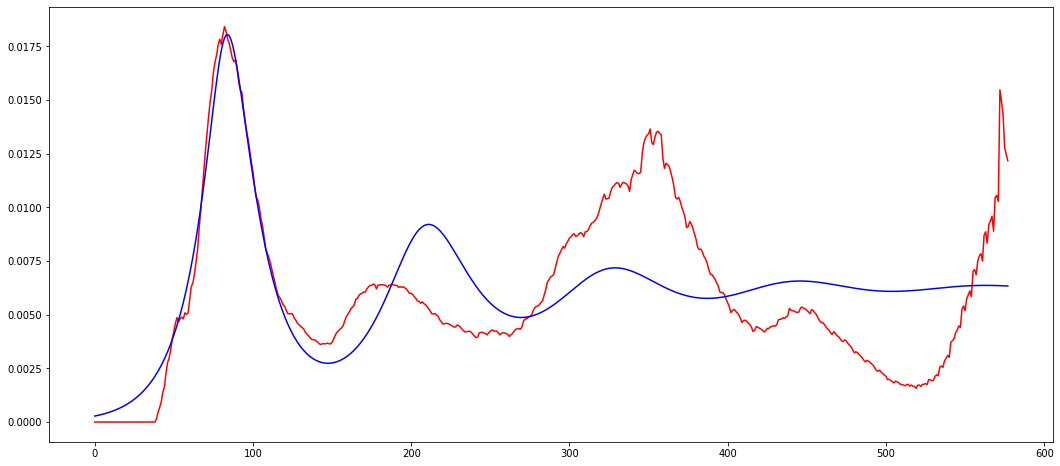

In [69]:
fig, ax = plt.subplots(figsize=(18,8))

gradDesc.x = gradDesc.simulate(gradDesc.params) #to ensure sim data is set if solve vars func was broken
ukVars = gradDesc.params

ax.plot(gradDesc.y, color="red")
ax.plot(gradDesc.x, color="blue")

## UK Fit

In [ ]:
dates, I, R, D, V = owid.LoadCountryNormal("United Kingdom")

gradDesc.eta = .001
gradDesc.delta = .001

bestError = 100

for i in range(100):
    gradDesc = gd.GradDescent(I, [sird.getGamma(I,R), sird.getNu(I,D), len(I)], startFunc, simFunc, constrainFunc)
    gradDesc.solveVars(printOut=10000)
    
    if(gradDesc.getError() < bestError):
        bestError = gradDesc.getError()
        ukVars = gradDesc.x
        print(bestError)

Startin Vars:
Error: 0.18065338787956192
[2.10300823e-04 9.92417917e-02 7.36905853e+00 3.36103235e-03
 2.62511087e-02 6.00786476e-02 3.84687777e+00]
0.0857416439087504
Startin Vars:
Error: 0.17299389146645403
[7.68014558e-04 2.48134790e-02 6.36516682e+00 8.96993332e-03
 5.62476893e-02 2.23953736e-02 3.76905394e+00]
Iteration: 10000 Error: 0.0954924898002709 , improvement: 3.5619143383723594e-05
0.07908894476774744
Startin Vars:
Error: 0.18025790822467813
[3.31697131e-05 9.10447762e-02 9.64321332e+00 1.13802516e-02
 2.09491944e-03 9.16301448e-02 2.07259428e+00]
Startin Vars:
Error: 0.17948398944151195
[5.30044128e-04 5.68264430e-02 9.95018543e+00 7.82382505e-03
 6.89280764e-02 6.92653109e-03 9.71823466e-01]


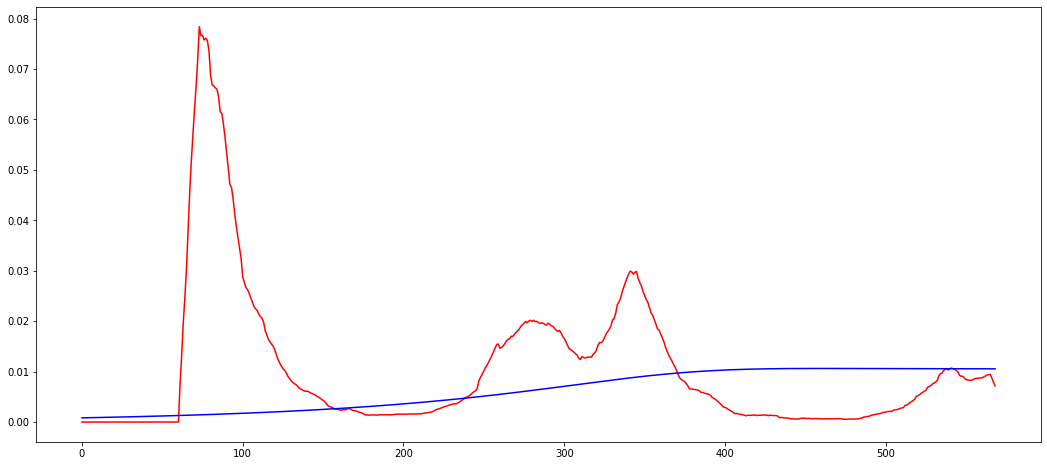

In [111]:
gradDesc.params = ukVars

gradDesc.x = gradDesc.simulate(gradDesc.params) #to ensure sim data is set if solve vars func was broken

#ukVars = gradDesc.params

fig, ax = plt.subplots(figsize=(18,8))

ax.plot(gradDesc.y, color="red")
ax.plot(gradDesc.x, color="blue")

<ipython-input-59-9a80b1327782>:2: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(np.diff(I+R+D)/I[:-1], color="red")
<ipython-input-59-9a80b1327782>:2: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(np.diff(I+R+D)/I[:-1], color="red")
<ipython-input-59-9a80b1327782>:4: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(np.diff(R+D)/I[:-1], color="green")


(0.0, 0.25)

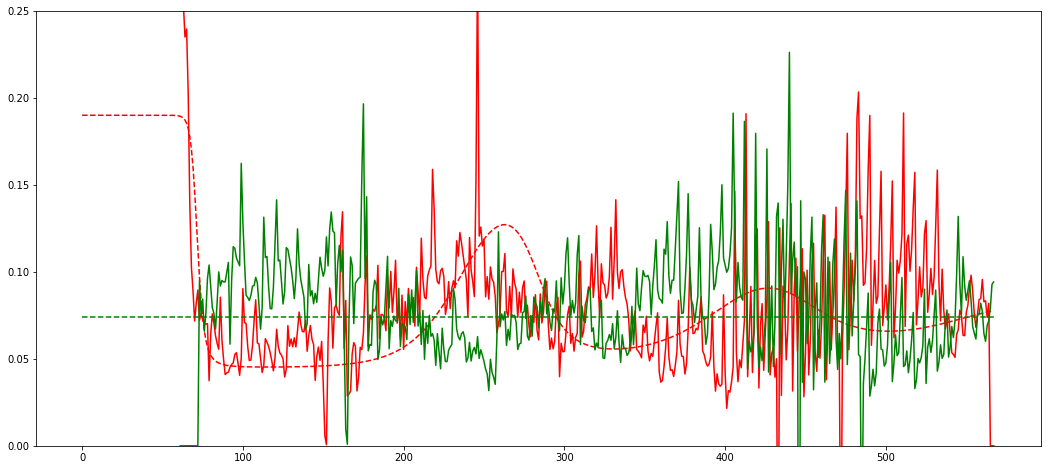

In [59]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(np.diff(I+R+D)/I[:-1], color="red")
ax.plot(  (np.diff(gradDesc.x) +  gradDesc.x[:-1]*(sird.getGamma(I,R)+sird.getNu(I,D)))/gradDesc.x[:-1], color="red", linestyle="dashed")
ax.plot(np.diff(R+D)/I[:-1], color="green")
ax.plot( np.ones(len(I))*(sird.getGamma(I,R)+sird.getNu(I,D)), color="green", linestyle="dashed" ) 

ax.set_ylim([0,.25])